### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Lunes 11 de Noviembre

### Base COMTRADE

In [1]:
# Para procesar los datos contenidos en los archivos COMTRADE instalamos:
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall

In [2]:
# Instalamos pandas:
import sys
!{sys.executable} -m pip install pandas

In [5]:
import pandas
import requests
import comtradeapicall

In [9]:
# Usamos la clave de suscripción, indicamos la ruta del directorio
subscription_key = '<YOUR KEY>' 
directory = '<OUTPUT DIR>'  
# Usamos el comando "proxy_url" para conectarnos a la API a través de un servidor proxy
proxy_url = '<PROXY URL>'  

In [19]:
# Convertimos los datos recibidos de la API a un dataframe. 

mydf = comtradeapicall.previewFinalData(typeCode='C', freqCode='A', clCode='HS', period='2015,2016,2017,2018,2019,2020,2021,2022,2023',
                                        reporterCode='32', cmdCode='080550', flowCode='X', partnerCode=None,
                                        partner2Code=None,
                                        customsCode=None, motCode=None, maxRecords=500, format_output='JSON',
                                        aggregateBy=None, breakdownMode='classic', countOnly=None, includeDesc=True)
print(mydf)
# Debido a que la API está limitada a 500 registros como máximo en la respuesta, no necesitamos proporcionar una clave de suscripción.

    typeCode freqCode  refPeriodId  refYear  refMonth period  reporterCode  \
0          C        A     20150101     2015        52   2015            32   
1          C        A     20150101     2015        52   2015            32   
2          C        A     20150101     2015        52   2015            32   
3          C        A     20150101     2015        52   2015            32   
4          C        A     20150101     2015        52   2015            32   
..       ...      ...          ...      ...       ...    ...           ...   
397        C        A     20230101     2023        52   2023            32   
398        C        A     20230101     2023        52   2023            32   
399        C        A     20230101     2023        52   2023            32   
400        C        A     20230101     2023        52   2023            32   
401        C        A     20230101     2023        52   2023            32   

    reporterISO reporterDesc flowCode  ...       netWgt  isNetW

In [2]:
import pandas as pd

# Especificamos la ruta completa del archivo Excel.
ruta_excel = "C:/Users/jose.lopez/OneDrive - Vicente Trapani Sa/Documents/GitHub/-Big-Data-UNT--Grupo-1-/Propuesta de Investigación/mi_comtrade2.xlsx"

# Para visualizar el dataframe usamos el comando:
mydf = pd.read_excel(ruta_excel)
print(mydf.head())
#C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\Propuesta de Investigación

  typeCode freqCode  refPeriodId  refYear  refMonth  period  reporterCode  \
0        C        A     20150101     2015        52    2015            32   
1        C        A     20150101     2015        52    2015            32   
2        0        A     20150101     2015        52    2015            32   
3        C        A     20150101     2015        52    2015            32   
4        C        A     20150101     2015        52    2015            32   

  reporterISO reporterDesc flowCode  ...       netWgt  isNetWgtEstimated  \
0         ARG    Argentina        X  ...  184755301.9              False   
1         ARG    Argentina        X  ...     622080.0              False   
2         ARG    Argentina        X  ...      38400.0              False   
3         ARG    Argentina        X  ...      48000.0              False   
4         ARG    Argentina        X  ...     225600.0              False   

  grossWgt isGrossWgtEstimated  cifvalue      fobvalue  primaryValue  \
0      N

In [4]:
# Filtramos los datos donde partnerISO sea igual a "World"
df_filtrado = mydf[mydf['partnerISO'] == 'W00']

# Agrupar por 'refYear' y sumar por 'netWgt' en el DataFrame filtrado
df_agrupado = df_filtrado.groupby('refYear')['netWgt'].sum()

# Imprimir el resultado
print(df_agrupado)

refYear
2015    184755301.9
2016    279443911.0
2017    241141242.2
2018    268651302.0
2019    231697160.0
2020    255090545.0
2021    256549463.0
2022    255476456.0
2023    218446344.0
Name: netWgt, dtype: float64


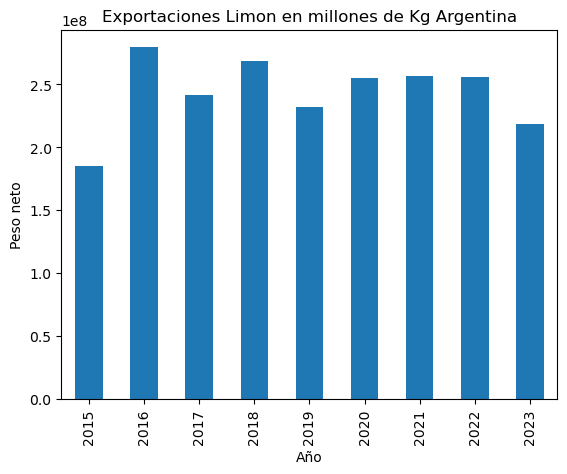

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un gráfico de barras
df_agrupado.plot(kind='bar')
df_agrupado_millones = df_agrupado / 1_000_000

# Paso 2: Crear el gráfico de barras
df_agrupado_millones.plot(kind='bar')

# Paso 3: Etiquetas de los ejes y título
plt.title('Exportaciones Limon en millones de Kg Argentina')
plt.xlabel('Año')
plt.ylabel('Peso neto')

# Paso 4: Mostrar el gráfico
plt.show()

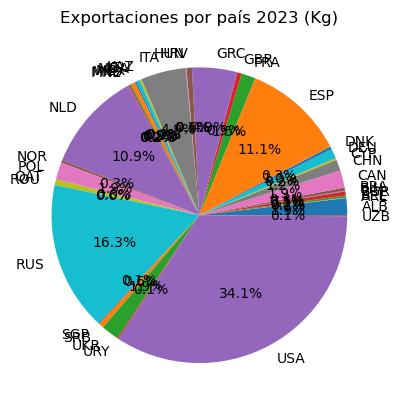

In [7]:
# Filtramos los datos para el año 2023 y excluimos W00
df = mydf[mydf['refYear'] == 2023]
df23 = df[df['partnerISO'] != 'W00']

# Agrupamos por partnerISO y sumar netWgt
df_agrupado = df23.groupby('partnerISO')['netWgt'].sum()

# Creamos un gráfico de torta
plt.pie(df_agrupado, labels=df_agrupado.index, autopct='%1.1f%%')
plt.title('Exportaciones por país 2023 (Kg)')
plt.show()

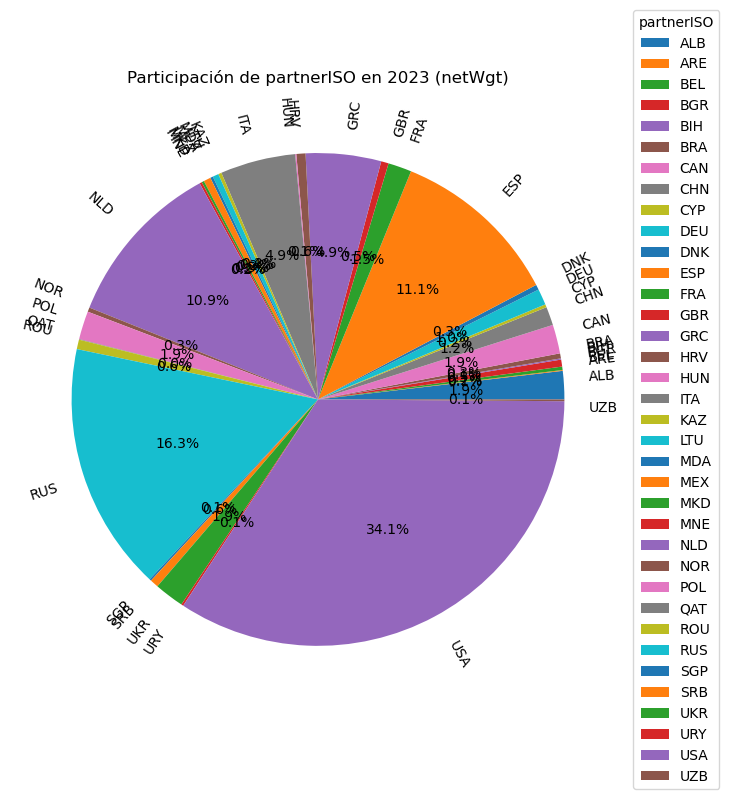

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(df_agrupado, labels=df_agrupado.index, autopct='%1.1f%%', rotatelabels=True)
plt.legend(df_agrupado.index, title="partnerISO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Participación de partnerISO en 2023 (netWgt)')
plt.show()

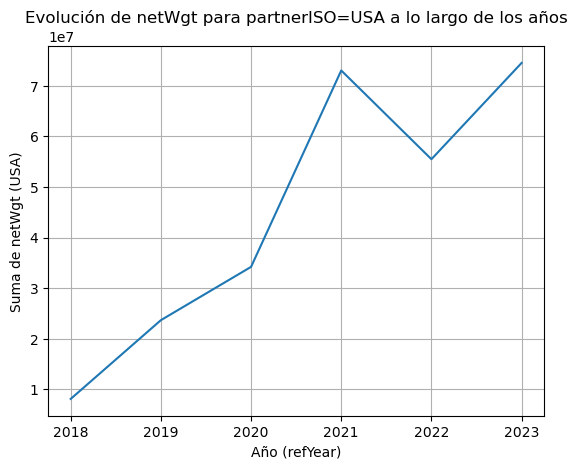

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para partnerISO=USA
df_usa = mydf[mydf['partnerISO'] == 'USA']

# Agrupar por refYear y sumar netWgt
df_usa_agrupado = df_usa.groupby('refYear')['netWgt'].sum()

# Crear el gráfico de línea
plt.plot(df_usa_agrupado.index, df_usa_agrupado.values)
plt.xlabel('Año (refYear)')
plt.ylabel('Suma de netWgt (USA)')
plt.title('Evolución de netWgt para partnerISO=USA a lo largo de los años')
plt.grid(True)
plt.show()

In [14]:
mydf.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20150101,2015,52,2015,32,ARG,Argentina,X,...,184755301.9,False,NaN,False,NaN,1.907667e+08,1.907667e+08,0,False,True
1,C,A,20150101,2015,52,2015,32,ARG,Argentina,X,...,622080.0,False,NaN,False,NaN,5.392296e+05,5.392296e+05,0,True,False
2,0,A,20150101,2015,52,2015,32,ARG,Argentina,X,...,38400.0,False,NaN,False,NaN,3.037597e+04,3.037597e+04,0,True,False
3,C,A,20150101,2015,52,2015,32,ARG,Argentina,X,...,48000.0,False,NaN,False,NaN,6.560000e+04,6.560000e+04,0,True,False
4,C,A,20150101,2015,52,2015,32,ARG,Argentina,X,...,225600.0,False,NaN,False,NaN,1.886400e+05,1.886400e+05,0,True,False


In [16]:

# Agregar la columna 'usdUnit' calculada como fobvalue / netwgt
mydf['usdUnit'] = mydf['fobvalue'] / mydf['netWgt']

# Mostrar el DataFrame con la nueva columna
print(mydf)


    typeCode freqCode  refPeriodId  refYear  refMonth  period  reporterCode  \
0          C        A     20150101     2015        52    2015            32   
1          C        A     20150101     2015        52    2015            32   
2          0        A     20150101     2015        52    2015            32   
3          C        A     20150101     2015        52    2015            32   
4          C        A     20150101     2015        52    2015            32   
..       ...      ...          ...      ...       ...     ...           ...   
397        C        A     20230101     2023        52    2023            32   
398        C        A     20230101     2023        52    2023            32   
399        C        A     20230101     2023        52    2023            32   
400        C        A     20230101     2023        52    2023            32   
401        C        A     20230101     2023        52    2023            32   

    reporterISO reporterDesc flowCode  ... isNetWgt

<Figure size 1000x600 with 0 Axes>

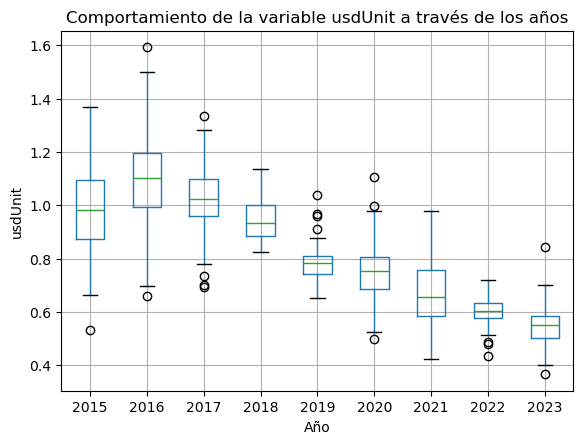

In [18]:
# Crear un gráfico de boxplot para describir el comportamiento de la variable usdUnit a través de los años
plt.figure(figsize=(10, 6))
mydf.boxplot(column='usdUnit', by='refYear')
plt.title('Comportamiento de la variable usdUnit a través de los años')
plt.suptitle('')  # Eliminar el título automático del boxplot
plt.xlabel('Año')
plt.ylabel('usdUnit')
plt.show()

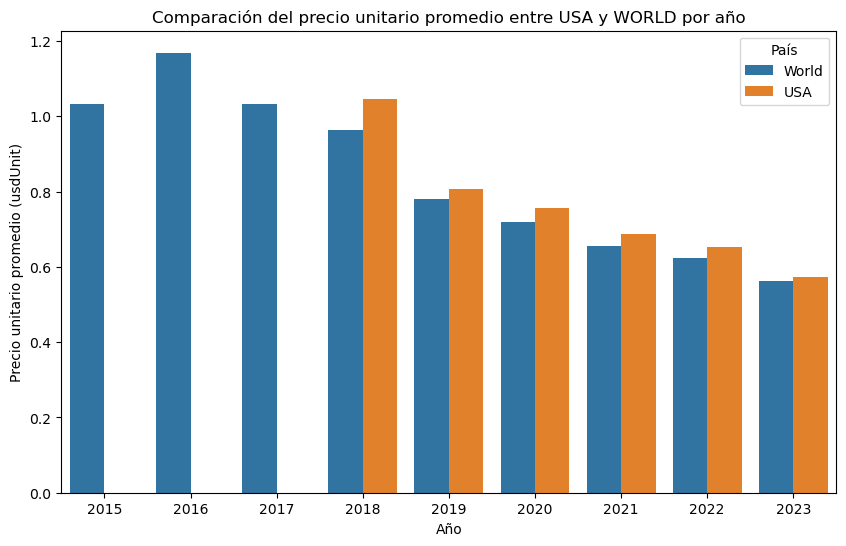

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame 'mydf' cargado

# Filtrar los datos para incluir solo los registros de USA y WORLD
df_filtered = mydf[mydf['partnerDesc'].isin(['USA', 'World'])]

# Agrupar los datos por año y partnerDesc, y calcular el valor medio de usdUnit
df_grouped = df_filtered.groupby(['refYear', 'partnerDesc'])['usdUnit'].mean().reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x='refYear', y='usdUnit', hue='partnerDesc', data=df_grouped)

# Personalizar el gráfico
plt.title('Comparación del precio unitario promedio entre USA y WORLD por año')
plt.xlabel('Año')
plt.ylabel('Precio unitario promedio (usdUnit)')
plt.legend(title='País')

plt.show()

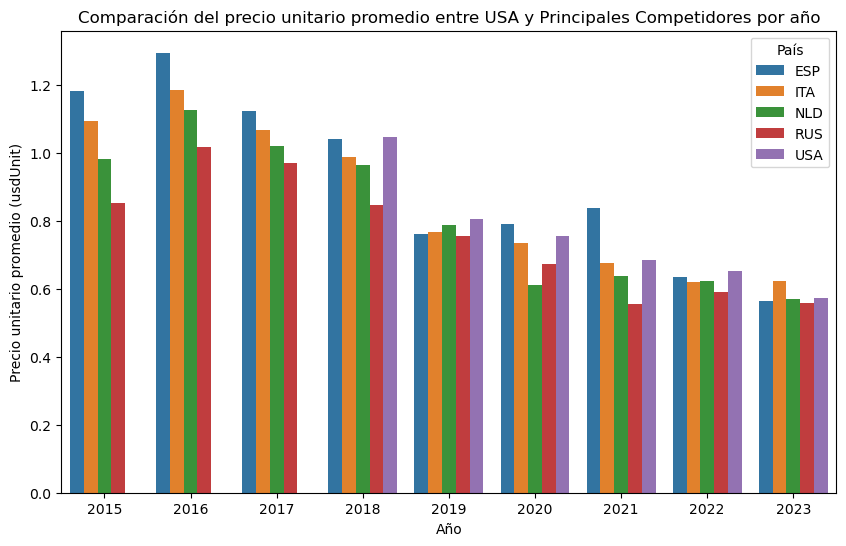

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame 'mydf' cargado

# Filtrar los datos para incluir solo los registros de USA y WORLD
df_filtered = mydf[mydf['partnerISO'].isin(['USA','RUS','NLD','ITA','ESP'])]

# Agrupar los datos por año y partnerDesc, y calcular el valor medio de usdUnit
df_grouped = df_filtered.groupby(['refYear', 'partnerISO'])['usdUnit'].mean().reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x='refYear', y='usdUnit', hue='partnerISO', data=df_grouped)

# Personalizar el gráfico
plt.title('Comparación del precio unitario promedio entre USA y Principales Competidores por año')
plt.xlabel('Año')
plt.ylabel('Precio unitario promedio (usdUnit)')
plt.legend(title='País')

plt.show()

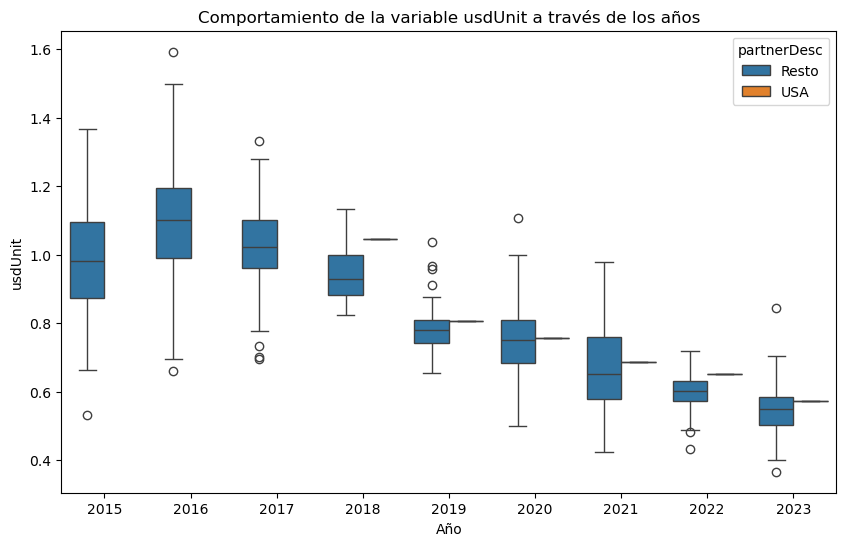

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame 'mydf' cargado

# Filtrar los datos para incluir solo los registros de USA y el resto (excluyendo WORLD)
df_filtered = mydf[~mydf['partnerDesc'].isin(['WORLD'])]  # Negamos la condición para excluir WORLD
df_filtered['partnerDesc'] = df_filtered['partnerDesc'].replace('USA', 'USA')  # Mantenemos 'USA' como está
df_filtered.loc[df_filtered['partnerDesc'] != 'USA', 'partnerDesc'] = 'Resto'  # El resto lo llamamos 'Resto'

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el boxplot para todos los datos, ahora agrupados por USA y Resto
sns.boxplot(x='refYear', y='usdUnit', hue='partnerDesc', data=df_filtered)

# Personalizar el gráfico
plt.title('Comportamiento de la variable usdUnit a través de los años')
plt.suptitle('')  # Eliminar el título automático del boxplot
plt.xlabel('Año')
plt.ylabel('usdUnit')

plt.show()

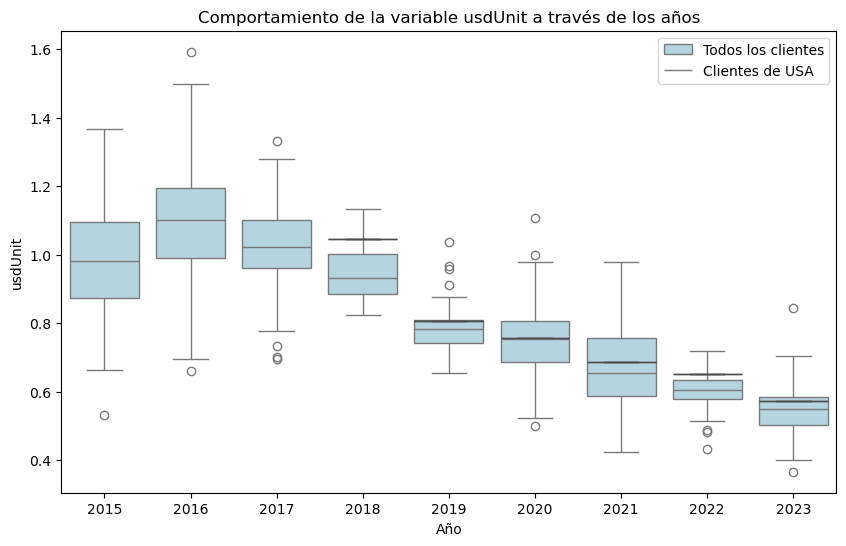

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame 'mydf' cargado

# Filtrar los datos para incluir solo los registros donde partnerDesc es igual a USA
df_usa = mydf[mydf['partnerDesc'] == 'USA']

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el primer boxplot para todos los datos
sns.boxplot(x='refYear', y='usdUnit', data=mydf, color='lightblue')

# Crear el segundo boxplot para los datos de USA
sns.boxplot(x='refYear', y='usdUnit', data=df_usa, color='red')

# Personalizar el gráfico
plt.title('Comportamiento de la variable usdUnit a través de los años')
plt.suptitle('')  # Eliminar el título automático del boxplot
plt.xlabel('Año')
plt.ylabel('usdUnit')

# Agregar leyenda
plt.legend(['Todos los clientes', 'Clientes de USA'])

plt.show()

<Axes: xlabel='usdUnit', ylabel='Density'>

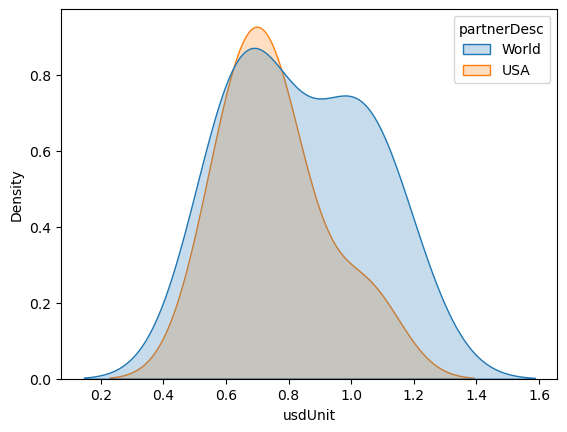

In [24]:
import seaborn as sns

# Filtra los datos para incluir solo los registros de USA y WORLD
df_filtered = mydf[mydf['partnerDesc'].isin(['USA', 'World'])]

# Crea el gráfico de densidad
sns.kdeplot(data=df_filtered, x='usdUnit', hue='partnerDesc', fill=True)

<Axes: xlabel='usdUnit', ylabel='Density'>

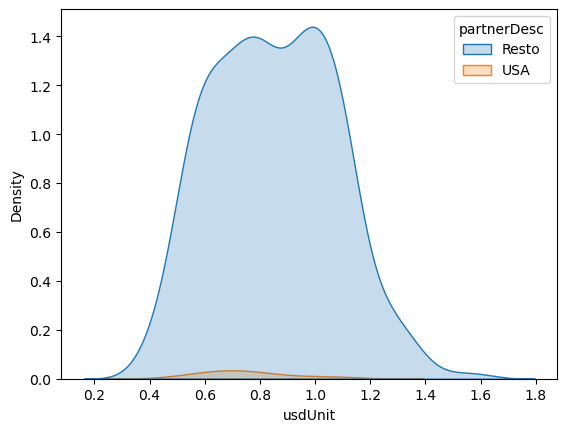

In [25]:
import pandas as pd
import seaborn as sns

# Filtra los datos para incluir solo los registros de USA y el resto (excluyendo WORLD)
df_filtered = mydf[~mydf['partnerDesc'].isin(['WORLD'])]  # Negamos la condición para excluir WORLD
df_filtered['partnerDesc'] = df_filtered['partnerDesc'].replace('USA', 'USA')  # Mantenemos 'USA' como está
df_filtered.loc[df_filtered['partnerDesc'] != 'USA', 'partnerDesc'] = 'Resto'  # El resto lo llamamos 'Resto'

# Crea el gráfico de densidad

sns.kdeplot(data=df_filtered, x='usdUnit', hue='partnerDesc', fill=True)

Países agrupados por clúster con valores de netWgt, fobvalue, y usdUnit:


C:\Users\jose.lopez\AppData\Local\Temp\ipykernel_21920\2025450426.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['cluster'] = kmeans.fit_predict(data_for_clustering[['netWgt', 'fobvalue', 'usdUnit']])


cluster,partnerDesc,netWgt,fobvalue,usdUnit
0,Albania,-0.365499,-0.379903,-0.644227
0,North Macedonia,-0.369649,-0.379853,-0.365324
0,Ukraine,0.209592,0.139834,-0.308429
0,Slovenia,-0.252079,-0.264111,-0.002288
0,Slovakia,-0.441646,-0.443767,-0.427287
0,Qatar,-0.389745,-0.401505,-0.769831
0,Montenegro,-0.362038,-0.371815,-0.272850
0,Rep. of Moldova,-0.412225,-0.416968,-0.255723
0,Malta,-0.438185,-0.441209,-0.712165
0,Malaysia,-0.386119,-0.395944,-0.513100


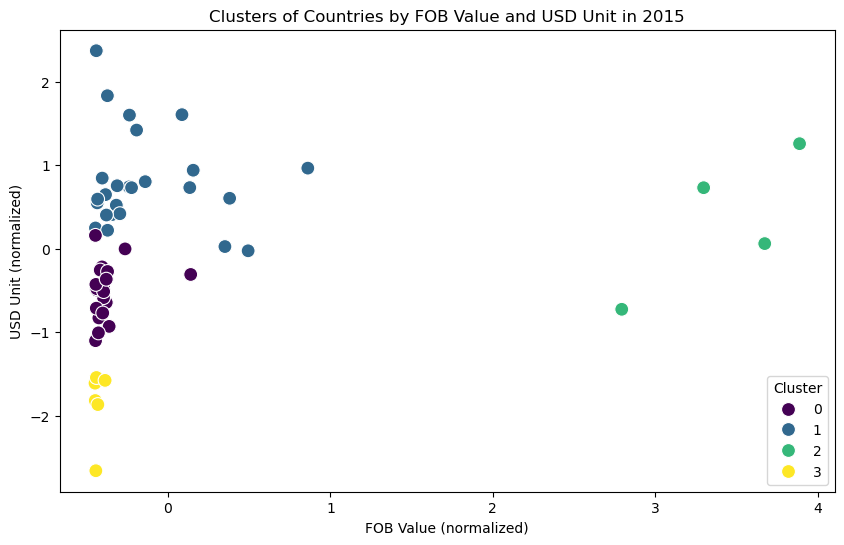

In [33]:
# Importar librerías necesarias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# 1. Filtrar los datos para refYear=2015 y excluir "World" en partnerDesc
mydf_2015 = mydf[(mydf['refYear'] == 2015) & (mydf['partnerDesc'] != 'World')]

# 2. Seleccionar las columnas relevantes para el análisis
data_for_clustering = mydf_2015[['partnerDesc', 'netWgt', 'fobvalue', 'usdUnit']]

# 3. Normalizar las variables numéricas utilizando .loc para evitar SettingWithCopyWarning
scaler = StandardScaler()
data_for_clustering.loc[:, ['netWgt', 'fobvalue', 'usdUnit']] = scaler.fit_transform(data_for_clustering[['netWgt', 'fobvalue', 'usdUnit']])

# 4. Implementar KMeans para el análisis de clúster
# Definimos el número de clústeres; por ejemplo, 4
kmeans = KMeans(n_clusters=4, random_state=42)
data_for_clustering['cluster'] = kmeans.fit_predict(data_for_clustering[['netWgt', 'fobvalue', 'usdUnit']])

# 5. Crear un cuadro con países agrupados por clúster, incluyendo valores de netWgt, fobvalue y usdUnit
clustered_data = data_for_clustering[['cluster', 'partnerDesc', 'netWgt', 'fobvalue', 'usdUnit']].sort_values(by='cluster').reset_index(drop=True)

# Mostrar el cuadro de clústeres con los valores de cada variable para cada país
print("Países agrupados por clúster con valores de netWgt, fobvalue, y usdUnit:")
display(HTML(clustered_data.to_html(index=False)))

# 6. Visualizar los resultados del clúster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_for_clustering, x='fobvalue', y='usdUnit', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Countries by FOB Value and USD Unit in 2015')
plt.xlabel('FOB Value (normalized)')
plt.ylabel('USD Unit (normalized)')
plt.legend(title='Cluster')
plt.show()


In [27]:
# Agrupar los datos por clúster y listar los países junto con sus valores de netWgt, fobvalue y usdUnit
clustered_data = data_for_clustering[['cluster', 'partnerDesc', 'netWgt', 'fobvalue', 'usdUnit']]


Países agrupados por clúster en 2015 con valores de netWgt, fobvalue, y usdUnit:


cluster,partnerDesc,netWgt,fobvalue,usdUnit
0,Albania,-0.365499,-0.379903,-0.644227
0,North Macedonia,-0.369649,-0.379853,-0.365324
0,Ukraine,0.209592,0.139834,-0.308429
0,Slovenia,-0.252079,-0.264111,-0.002288
0,Slovakia,-0.441646,-0.443767,-0.427287
0,Qatar,-0.389745,-0.401505,-0.769831
0,Montenegro,-0.362038,-0.371815,-0.272850
0,Rep. of Moldova,-0.412225,-0.416968,-0.255723
0,Malta,-0.438185,-0.441209,-0.712165
0,Malaysia,-0.386119,-0.395944,-0.513100


Países agrupados por clúster en 2023 con valores de netWgt, fobvalue, y usdUnit:


cluster,partnerDesc,netWgt,fobvalue,usdUnit
0,Uzbekistan,-0.417441,-0.413173,0.051184
0,Romania,-0.337470,-0.325631,0.745216
0,United Arab Emirates,-0.426853,-0.420887,1.094400
0,Lithuania,-0.374254,-0.363521,0.905594
0,Kazakhstan,-0.401608,-0.397892,0.052427
0,Italy,0.337696,0.416500,0.907192
0,Hungary,-0.423225,-0.418558,0.156183
0,Ukraine,-0.130356,-0.139224,-0.013635
0,Norway,-0.390706,-0.364223,3.439855
0,France,-0.194449,-0.181137,0.510094


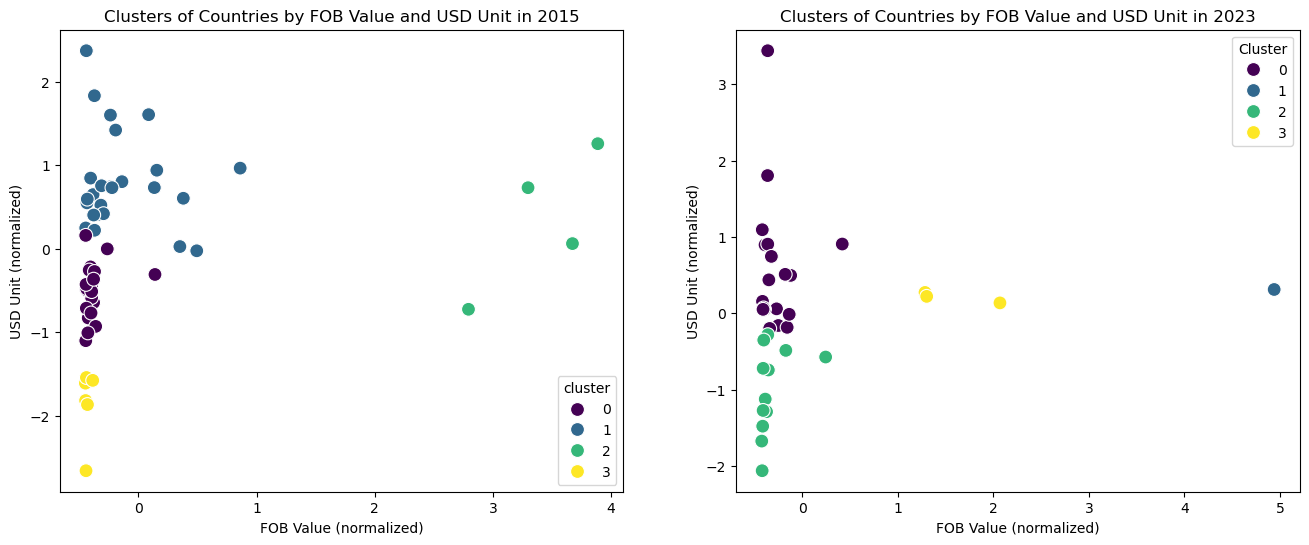

In [29]:
# Importar librerías necesarias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Definir una función para el procesamiento y clustering por año
def cluster_by_year(df, year, n_clusters=4):
    # Filtrar datos por año y excluir "World" de partnerDesc
    df_year = df[(df['refYear'] == year) & (df['partnerDesc'] != 'World')].copy()
    
    # Seleccionar columnas relevantes
    data_for_clustering = df_year[['partnerDesc', 'netWgt', 'fobvalue', 'usdUnit']].copy()
    
    # Normalizar variables numéricas
    scaler = StandardScaler()
    data_for_clustering[['netWgt', 'fobvalue', 'usdUnit']] = scaler.fit_transform(data_for_clustering[['netWgt', 'fobvalue', 'usdUnit']])
    
    # Implementar KMeans para el análisis de clúster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data_for_clustering['cluster'] = kmeans.fit_predict(data_for_clustering[['netWgt', 'fobvalue', 'usdUnit']])
    
    return data_for_clustering

# Realizar el clustering para 2015 y 2023
data_2015_clusters = cluster_by_year(mydf, 2015)
data_2023_clusters = cluster_by_year(mydf, 2023)

# Crear cuadros para cada año con países agrupados por clúster y valores de las variables
print("Países agrupados por clúster en 2015 con valores de netWgt, fobvalue, y usdUnit:")
display(HTML(data_2015_clusters[['cluster', 'partnerDesc', 'netWgt', 'fobvalue', 'usdUnit']].sort_values(by='cluster').to_html(index=False)))

print("Países agrupados por clúster en 2023 con valores de netWgt, fobvalue, y usdUnit:")
display(HTML(data_2023_clusters[['cluster', 'partnerDesc', 'netWgt', 'fobvalue', 'usdUnit']].sort_values(by='cluster').to_html(index=False)))

# Visualizar los clústeres para 201 y 2023 en gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para 2015
sns.scatterplot(data=data_2015_clusters, x='fobvalue', y='usdUnit', hue='cluster', palette='viridis', s=100, ax=axes[0])
axes[0].set_title('Clusters of Countries by FOB Value and USD Unit in 2015')
axes[0].set_xlabel('FOB Value (normalized)')
axes[0].set_ylabel('USD Unit (normalized)')

# Gráfico para 2023
sns.scatterplot(data=data_2023_clusters, x='fobvalue', y='usdUnit', hue='cluster', palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Clusters of Countries by FOB Value and USD Unit in 2023')
axes[1].set_xlabel('FOB Value (normalized)')
axes[1].set_ylabel('USD Unit (normalized)')

plt.legend(title='Cluster')
plt.show()


In [31]:
# Importar librerías necesarias
import pandas as pd

# Suponemos que ya tienes los datos de los clusters para los años 2015 y 2023
# y que los DataFrames se llaman data_2015 y data_2023, cada uno con las columnas
# 'partnerDesc', 'netWgt', 'fobvalue', 'usdUnit', y 'cluster'

# Crear un diccionario para almacenar los resultados
stats = {}

# Listado de años a analizar
years = [2015, 2023]

for year in years:
    # Selecciona el DataFrame adecuado según el año
    if year == 2015:
        data = data_2015_clusters
    else:
        data = data_2023_clusters
    
    # Calcular la media y desviación estándar por cluster
    cluster_stats = data.groupby('cluster')[['netWgt', 'fobvalue', 'usdUnit']].agg(['mean', 'std'])
    
    # Guardar los resultados en el diccionario
    stats[year] = cluster_stats

# Mostrar los resultados de cada año
for year, cluster_stats in stats.items():
    print(f"\nEstadísticas de medias y desviaciones estándar para el año {year}:\n")
    print(cluster_stats)



Estadísticas de medias y desviaciones estándar para el año 2015:

           netWgt            fobvalue             usdUnit          
             mean       std      mean       std      mean       std
cluster                                                            
0       -0.365925  0.143054 -0.376959  0.128750 -0.510621  0.323810
1       -0.154996  0.338362 -0.140511  0.349779  0.798433  0.573438
2        3.434150  0.330462  3.412960  0.479821  0.331129  0.857935
3       -0.423866  0.033758 -0.433312  0.023510 -1.845484  0.420048

Estadísticas de medias y desviaciones estándar para el año 2023:

           netWgt            fobvalue             usdUnit          
             mean       std      mean       std      mean       std
cluster                                                            
0       -0.292813  0.180006 -0.283859  0.192029  0.555893  0.856699
1        4.909613       NaN  4.939025       NaN  0.311708       NaN
2       -0.313792  0.219365 -0.326112  0.191634 -1